In [6]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

import pandas as pd
import numpy as np
import catboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from itertools import chain, combinations
from scipy.special import softmax

from tqdm import tqdm
from warnings import filterwarnings
from IPython.display import display

filterwarnings("ignore")
pd.set_option('display.max_columns', None)
np.random.seed(42)

import os
from collections import defaultdict
import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import pipeline
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import os
from collections import defaultdict
import pprint

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pprint.PrettyPrinter(indent=4)

In [2]:
def get_bootstrap(
    data_column_1,
    data_column_2,
    boot_it=1_000,
    statistic=np.mean,
    bootstrap_conf_level=0.95
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):
        samples_1 = data_column_1.sample(
            boot_len,
            replace=True
        ).values

        samples_2 = data_column_2.sample(
            boot_len,
            replace=True
        ).values

        boot_data.append(statistic(samples_1-samples_2))
    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data)
    )

    p_2 = norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data)
    )

    p_value = min(p_1, p_2) * 2

    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else:
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')

    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

In [28]:
n = 1000

sample_1 = np.random.exponential(scale=1/0.001, size=n)
sample_2 = np.random.exponential(scale=1/0.001, size=n)

df = pd.DataFrame({
    "sample_1": sample_1,
    "sample_2": sample_2
})

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 7160.45it/s]


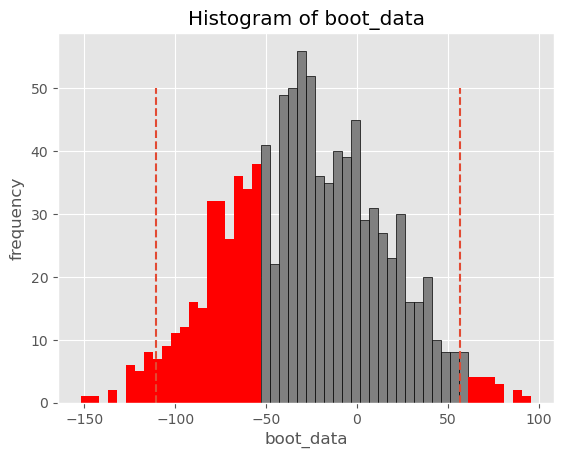

In [29]:
booted_data = get_bootstrap(df.sample_1, df.sample_2) # в результате хранится разница двух распределений, ДИ и pvalue

In [30]:
# p_value > 0.05 => не отвергаем H0 => нет различий
# p_value < 0.05 => отвергаем H0 => есть различия
booted_data["p_value"] # альфа

0.5136784575370018

In [32]:
booted_data["quants"] # ДИ 0.975

,0
0.025,-110.676809
0.975,56.540988
